In [1]:
#!pip install robustness==1.1  # (or 1.1.post2)

# imports

In [2]:
import os
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

from robustness import datasets
from robustness.tools.imagenet_helpers import common_superclass_wnid, ImageNetHierarchy

sys.path.append("../")
from src.image_process.noise import gaussian_noise
from src.image_process.utils import imshow
from src.dataset.imagenet16 import load_imagenet16

%matplotlib inline

# arguments

In [3]:
OUT_DIR = "./results"
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)

In [4]:
# data settings
batch_size = 32

# random seed settings
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

# main

In [5]:
# load data
# Normalization is set "False" for showing images.
# (It's  set "True" in training or testing)
train_loader, _ = load_imagenet16(
    imagenet_path='/Users/sou/lab1-mnt/data1/ImageNet/ILSVRC2012/', 
    info_path='../src/dataset/info/',
    batch_size=batch_size, normalize=False)

==> Preparing dataset custom_imagenet..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


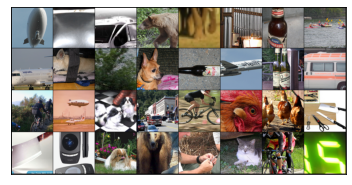

In [6]:
iterator = enumerate(train_loader)
_, (im, lab) = next(iterator)

# show images
imshow(
    torchvision.utils.make_grid(im),
    filename=os.path.join(OUT_DIR, "raw_images.png"),
    scale=False,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


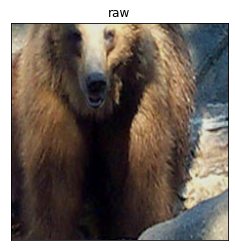

In [7]:
index = 27
raw = im[index]
imshow(raw, title="raw", filename=os.path.join(OUT_DIR, "raw.png"), scale=False)
# matplotlib.image.imsave(os.path.join(OUT_DIR, 'image_raw.png'), raw.numpy().transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


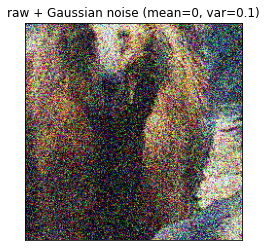

In [8]:
mean = 0
var = 0.1
noisy = gaussian_noise(images=raw, mean=mean, var=var)
print(noisy.shape)
imshow(
        noisy,
        title=f"raw + Gaussian noise (mean={mean}, var={var})",
        filename=os.path.join(OUT_DIR, f"gaussian-noise_mean{mean}_var{var}.png"),
        scale=False,
    )